<a href="https://colab.research.google.com/github/luasampaio/data-engineering/blob/main/26_ntb_Transformations_PySpark.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- Transformations with PySpark   - EM andamento
 - Luciana Sampaio
 - Analise Cartao Credito



In [8]:
from pyspark.sql import SparkSession

# Cria uma SparkSession
spark = SparkSession.builder.appName("LoadCSVFromGoogleDrive").getOrCreate()

# Link direto para download do arquivo
url = 'https://drive.google.com/uc?id=1rF29g_lhI6Yd9Kqcnj8-lHkJDRblQ4NI'

# Baixar o arquivo localmente (opcional, caso o Spark não consiga carregar diretamente da URL)
import requests

response = requests.get(url)
with open("data.csv", "wb") as f:
    f.write(response.content)

# Carrega o arquivo CSV em um DataFrame do Spark
df = spark.read.csv("data.csv", header=True, inferSchema=True)

# Mostra as primeiras linhas do DataFrame
df.show()


+---------------+--------+--------------------+-------------------+-------------+------------------+----------+----------------------+--------------------+-------------+---------------+-------------------+---+-------------------+----------+----------------+--------------------+--------------+-------------+--------------+-----+
|checking_status|duration|      credit_history|            purpose|credit_amount|    savings_status|employment|installment_commitment|     personal_status|other_parties|residence_since| property_magnitude|age|other_payment_plans|   housing|existing_credits|                 job|num_dependents|own_telephone|foreign_worker|class|
+---------------+--------+--------------------+-------------------+-------------+------------------+----------+----------------------+--------------------+-------------+---------------+-------------------+---+-------------------+----------+----------------+--------------------+--------------+-------------+--------------+-----+
|            

In [9]:
df.printSchema()

root
 |-- checking_status: string (nullable = true)
 |-- duration: integer (nullable = true)
 |-- credit_history: string (nullable = true)
 |-- purpose: string (nullable = true)
 |-- credit_amount: integer (nullable = true)
 |-- savings_status: string (nullable = true)
 |-- employment: string (nullable = true)
 |-- installment_commitment: integer (nullable = true)
 |-- personal_status: string (nullable = true)
 |-- other_parties: string (nullable = true)
 |-- residence_since: integer (nullable = true)
 |-- property_magnitude: string (nullable = true)
 |-- age: integer (nullable = true)
 |-- other_payment_plans: string (nullable = true)
 |-- housing: string (nullable = true)
 |-- existing_credits: integer (nullable = true)
 |-- job: string (nullable = true)
 |-- num_dependents: integer (nullable = true)
 |-- own_telephone: string (nullable = true)
 |-- foreign_worker: string (nullable = true)
 |-- class: string (nullable = true)



In [11]:

df.orderBy(df['age'].desc()).show()

+---------------+--------+--------------------+----------+-------------+------------------+----------+----------------------+--------------------+--------------+---------------+-------------------+---+-------------------+----------+----------------+--------------------+--------------+-------------+--------------+-----+
|checking_status|duration|      credit_history|   purpose|credit_amount|    savings_status|employment|installment_commitment|     personal_status| other_parties|residence_since| property_magnitude|age|other_payment_plans|   housing|existing_credits|                 job|num_dependents|own_telephone|foreign_worker|class|
+---------------+--------+--------------------+----------+-------------+------------------+----------+----------------------+--------------------+--------------+---------------+-------------------+---+-------------------+----------+----------------+--------------------+--------------+-------------+--------------+-----+
|             <0|      24|'critical/o

In [12]:
print(df.dtypes)

[('checking_status', 'string'), ('duration', 'int'), ('credit_history', 'string'), ('purpose', 'string'), ('credit_amount', 'int'), ('savings_status', 'string'), ('employment', 'string'), ('installment_commitment', 'int'), ('personal_status', 'string'), ('other_parties', 'string'), ('residence_since', 'int'), ('property_magnitude', 'string'), ('age', 'int'), ('other_payment_plans', 'string'), ('housing', 'string'), ('existing_credits', 'int'), ('job', 'string'), ('num_dependents', 'int'), ('own_telephone', 'string'), ('foreign_worker', 'string'), ('class', 'string')]


Funcao para validar os dados nulos

In [15]:
from pyspark.sql.functions import col, isnull, sum as _sum

# verificando dados nulos
for c in df.columns:  # Iterate over columns
    null_count = df.select(_sum(isnull(col(c)).cast("int")).alias(c)).collect()[0][0]
    print(f"Column {c}: {null_count} null values")

Column checking_status: 0 null values
Column duration: 0 null values
Column credit_history: 0 null values
Column purpose: 0 null values
Column credit_amount: 0 null values
Column savings_status: 0 null values
Column employment: 0 null values
Column installment_commitment: 0 null values
Column personal_status: 0 null values
Column other_parties: 0 null values
Column residence_since: 0 null values
Column property_magnitude: 0 null values
Column age: 0 null values
Column other_payment_plans: 0 null values
Column housing: 0 null values
Column existing_credits: 0 null values
Column job: 0 null values
Column num_dependents: 0 null values
Column own_telephone: 0 null values
Column foreign_worker: 0 null values
Column class: 0 null values


In [20]:
from pyspark.sql.functions import count


result = df.select(count("class")).collect()[0][0]

print(f"A soma da coluna 'class' é: {result}")


A soma da coluna 'class' é: 1000


In [21]:
df.count()

1000

# Volumetria

In [22]:
num_rows = df.count()
num_cols = len(df.columns)

print("Numero de linhas na tabela", num_rows)
print("Numero de colunas na tabela", num_cols)

Numero de linhas na tabela 1000
Numero de colunas na tabela 21


In [24]:

df2 = df.dropna()
# Show the updated DataFrame
df2.show()

+---------------+--------+--------------------+-------------------+-------------+------------------+----------+----------------------+--------------------+-------------+---------------+-------------------+---+-------------------+----------+----------------+--------------------+--------------+-------------+--------------+-----+
|checking_status|duration|      credit_history|            purpose|credit_amount|    savings_status|employment|installment_commitment|     personal_status|other_parties|residence_since| property_magnitude|age|other_payment_plans|   housing|existing_credits|                 job|num_dependents|own_telephone|foreign_worker|class|
+---------------+--------+--------------------+-------------------+-------------+------------------+----------+----------------------+--------------------+-------------+---------------+-------------------+---+-------------------+----------+----------------+--------------------+--------------+-------------+--------------+-----+
|            

In [25]:
df2.count()

1000

# Idade Média

In [28]:
from pyspark.sql.functions import avg, col, when
avg_salary = df.select(avg("age")).collect()[0][0]

print(f"A Idade Média é: {avg_salary}")

A Idade Média é: 35.546


# Criando Categoria de Idade


In [29]:
from pyspark.sql.functions import udf
from pyspark.sql.types import StringType

# Define a Python function
def age_category(age):
    if age < 18:
        return "Child"
    elif age < 65:
        return "Adult"
    else:
        return "Senior"

# Converte a função em uma UDF
age_category_udf = udf(age_category, StringType())

# Aplica a UDF ao DataFrame
df = df.withColumn("age_category", age_category_udf(df["age"]))

# Mostra o DataFrame atualizado
df.show()


+---------------+--------+--------------------+-------------------+-------------+------------------+----------+----------------------+--------------------+-------------+---------------+-------------------+---+-------------------+----------+----------------+--------------------+--------------+-------------+--------------+-----+------------+
|checking_status|duration|      credit_history|            purpose|credit_amount|    savings_status|employment|installment_commitment|     personal_status|other_parties|residence_since| property_magnitude|age|other_payment_plans|   housing|existing_credits|                 job|num_dependents|own_telephone|foreign_worker|class|age_category|
+---------------+--------+--------------------+-------------------+-------------+------------------+----------+----------------------+--------------------+-------------+---------------+-------------------+---+-------------------+----------+----------------+--------------------+--------------+-------------+---------

In [30]:
df.cache()

DataFrame[checking_status: string, duration: int, credit_history: string, purpose: string, credit_amount: int, savings_status: string, employment: string, installment_commitment: int, personal_status: string, other_parties: string, residence_since: int, property_magnitude: string, age: int, other_payment_plans: string, housing: string, existing_credits: int, job: string, num_dependents: int, own_telephone: string, foreign_worker: string, class: string, age_category: string]

# Filtrando

In [37]:
foreign_worker_df = df[df["foreign_worker"] == "no"]  # Filter the DataFrame
foreign_worker_count = foreign_worker_df.count()      # contar a quantidade de dados
print(f"Number of foreign workers with 'no': {foreign_worker_count}")

# If you want to display the filtered DataFrame:
foreign_worker_df.show()

Number of foreign workers with 'no': 37
+---------------+--------+--------------------+-------------------+-------------+------------------+----------+----------------------+--------------------+--------------+---------------+-------------------+---+-------------------+-------+----------------+--------------------+--------------+-------------+--------------+-----+------------+
|checking_status|duration|      credit_history|            purpose|credit_amount|    savings_status|employment|installment_commitment|     personal_status| other_parties|residence_since| property_magnitude|age|other_payment_plans|housing|existing_credits|                 job|num_dependents|own_telephone|foreign_worker|class|age_category|
+---------------+--------+--------------------+-------------------+-------------+------------------+----------+----------------------+--------------------+--------------+---------------+-------------------+---+-------------------+-------+----------------+--------------------+----

In [40]:
foreign_worker_df.groupBy("foreign_worker").count().show()

+--------------+-----+
|foreign_worker|count|
+--------------+-----+
|            no|   37|
+--------------+-----+



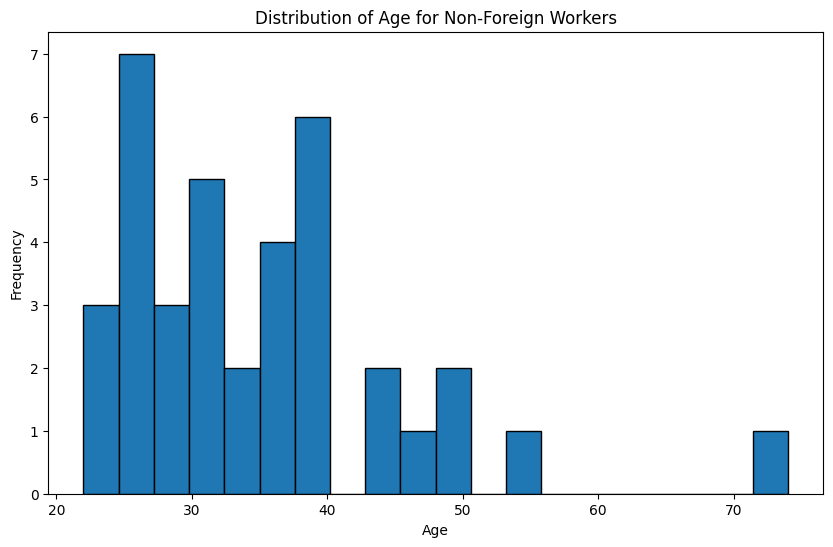

In [46]:
import matplotlib.pyplot as plt

# Convert the Spark DataFrame to a Pandas DataFrame for plotting
pandas_df = foreign_worker_df.toPandas()

# Example plot: Histogram of age
plt.figure(figsize=(10, 6))
plt.hist(pandas_df['age'], bins=20, edgecolor='black')
plt.title('Distribuição Idade Funcionarios Estrangeiros')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()



In [43]:
foreign_worker_count = foreign_worker_df.count()
print(f"Quantidade funcionario estrangeiro é : {foreign_worker_count}")

Quantidade funcionario estrangeiro é : 37


37